In [145]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
import numpy as np

In [146]:
Ticker = "EURUSD=X"
start = '2023-01-01'
end = '2024-01-31'
data = yf.download(Ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [147]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0
...,...,...,...,...,...,...
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0
2024-01-01,1.105583,1.105339,1.103997,1.105583,1.105583,0


<AxesSubplot:xlabel='Date'>

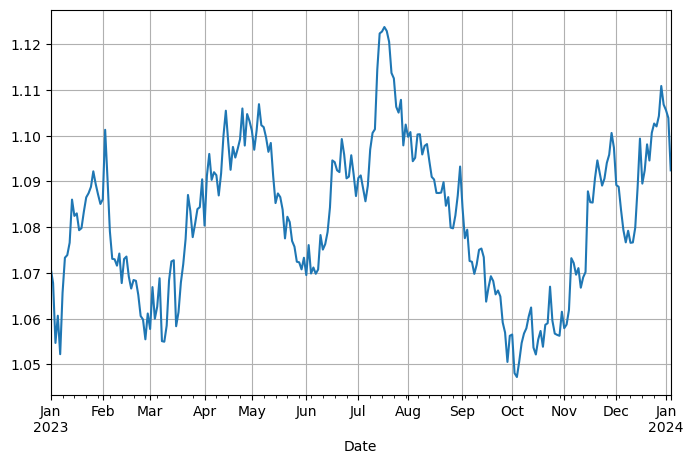

In [148]:
data['Close'].plot(grid=True, figsize=(8, 5))

In [149]:


data['42d'] = np.round(data['Close'].rolling(window=42).mean(), 2)
data['252d'] = np.round(data['Close'].rolling(window=252).mean(),2)

# Calculates the shorter SMA1 42d

# Calculates the longer SMA2 252d

In [150]:
data[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2023-12-28,1.110864,1.09,1.08
2023-12-29,1.106819,1.09,1.08
2024-01-01,1.105583,1.09,1.08
2024-01-02,1.103875,1.09,1.08
2024-01-03,1.092419,1.09,1.08


<AxesSubplot:xlabel='Date'>

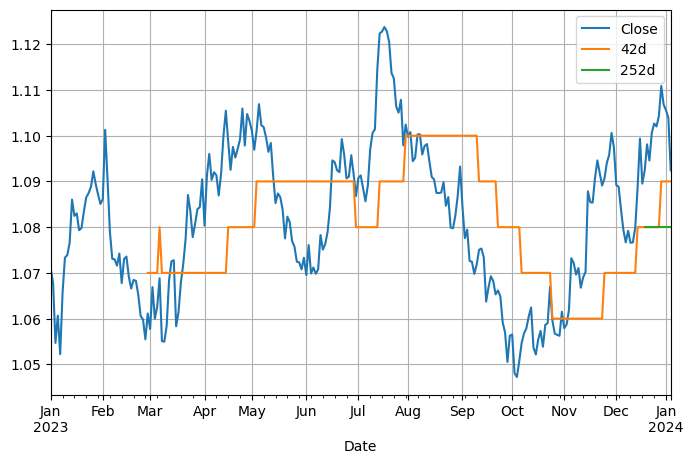

In [151]:
data[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))


In [152]:
data['42-252'] = data['42d'] - data['252d']

In [153]:
data['42-252'].tail()

Date
2023-12-28    0.01
2023-12-29    0.01
2024-01-01    0.01
2024-01-02    0.01
2024-01-03    0.01
Name: 42-252, dtype: float64

In [185]:
data['42-252'].head()

Date
2023-12-21    0.0
2023-12-22    0.0
2023-12-25    0.0
2023-12-26    0.0
2023-12-27    0.0
Name: 42-252, dtype: float64

In [186]:
data.dropna(inplace=True)

# Derives the position values based on same-day SMA values


In [187]:
data['p'] = np.where(data['42d'] > data['252d'], 1, -1) 

In [157]:
data

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252,p
Date,,,,,,,,,,
2023-12-19,1.092383,1.098800,1.091608,1.092383,1.092383,0,1.08,1.08,0.00,-1
2023-12-20,1.098105,1.097972,1.093565,1.098105,1.098105,0,1.08,1.08,0.00,-1
2023-12-21,1.094571,1.099977,1.093625,1.094571,1.094571,0,1.08,1.08,0.00,-1
2023-12-22,1.100619,1.104057,1.099421,1.100619,1.100619,0,1.08,1.08,0.00,-1
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,1.08,1.08,0.00,-1
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,1.08,1.08,0.00,-1
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,1.08,1.08,0.00,-1
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,1.09,1.08,0.01,1
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,1.09,1.08,0.01,1


# Shifts the position values by one day to avoid foresight bias

In [188]:
 data['p'] = data['p'].shift(1)

In [189]:
data

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252,p,r,s,s_
Date,,,,,,,,,,,,,
2023-12-21,1.094571,1.099977,1.093625,1.094571,1.094571,0,1.08,1.08,0.00,NaN,-0.003223,0.003223,-0.006777
2023-12-22,1.100619,1.104057,1.099421,1.100619,1.100619,0,1.08,1.08,0.00,-1.0,0.005510,-0.005510,-0.005510
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,1.08,1.08,0.00,-1.0,0.001851,-0.001851,-0.001851
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,1.08,1.08,0.00,-1.0,-0.000573,0.000573,0.000573
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,1.08,1.08,0.00,-1.0,0.002063,-0.002063,-0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,1.09,1.08,0.01,-1.0,0.005926,-0.005926,-0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,1.09,1.08,0.01,1.0,-0.003648,-0.003648,-0.008648
2024-01-01,1.105583,1.105339,1.103997,1.105583,1.105583,0,1.09,1.08,0.01,1.0,-0.001117,-0.001117,-0.001117
2024-01-02,1.103875,1.104606,1.094200,1.103875,1.103875,0,1.09,1.08,0.01,1.0,-0.001547,-0.001547,-0.001547


In [190]:
data.dropna(inplace=True) 

# Visualizes the position values as derived from the SMAs


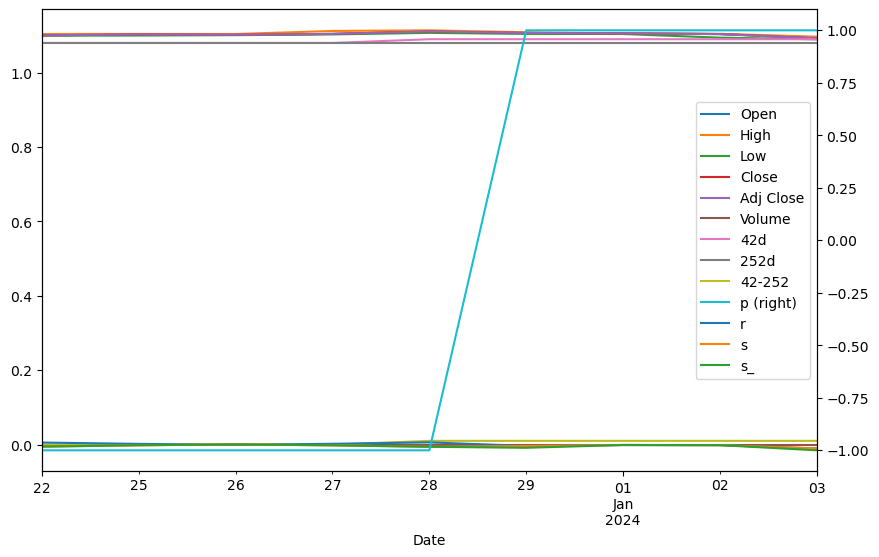

In [191]:
data.plot(figsize=(10, 6), secondary_y='p');

# Calculates the log returns

In [192]:
data['r'] = np.log(data['Close'] / data['Close'].shift(1))

In [193]:
data

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252,p,r,s,s_
Date,,,,,,,,,,,,,
2023-12-22,1.100619,1.104057,1.099421,1.100619,1.100619,0,1.08,1.08,0.00,-1.0,NaN,-0.005510,-0.005510
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,1.08,1.08,0.00,-1.0,0.001851,-0.001851,-0.001851
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,1.08,1.08,0.00,-1.0,-0.000573,0.000573,0.000573
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,1.08,1.08,0.00,-1.0,0.002063,-0.002063,-0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,1.09,1.08,0.01,-1.0,0.005926,-0.005926,-0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,1.09,1.08,0.01,1.0,-0.003648,-0.003648,-0.008648
2024-01-01,1.105583,1.105339,1.103997,1.105583,1.105583,0,1.09,1.08,0.01,1.0,-0.001117,-0.001117,-0.001117
2024-01-02,1.103875,1.104606,1.094200,1.103875,1.103875,0,1.09,1.08,0.01,1.0,-0.001547,-0.001547,-0.001547
2024-01-03,1.094691,1.096732,1.089800,1.092419,1.092419,0,1.09,1.08,0.01,1.0,-0.010432,-0.010432,-0.015432


In [194]:
data.dropna(inplace=True)


# Calculates the strategy returns

In [195]:
data['s'] = data['p'] * data['r']

In [196]:
data

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252,p,r,s,s_
Date,,,,,,,,,,,,,
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,1.08,1.08,0.00,-1.0,0.001851,-0.001851,-0.001851
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,1.08,1.08,0.00,-1.0,-0.000573,0.000573,0.000573
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,1.08,1.08,0.00,-1.0,0.002063,-0.002063,-0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,1.09,1.08,0.01,-1.0,0.005926,-0.005926,-0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,1.09,1.08,0.01,1.0,-0.003648,-0.003648,-0.008648
2024-01-01,1.105583,1.105339,1.103997,1.105583,1.105583,0,1.09,1.08,0.01,1.0,-0.001117,-0.001117,-0.001117
2024-01-02,1.103875,1.104606,1.094200,1.103875,1.103875,0,1.09,1.08,0.01,1.0,-0.001547,-0.001547,-0.001547
2024-01-03,1.094691,1.096732,1.089800,1.092419,1.092419,0,1.09,1.08,0.01,1.0,-0.010432,-0.010432,-0.015432


# Calculates the gross performances

In [170]:
data[['r', 's']].sum().apply(np.exp) 

r    0.994822
s    0.972100
dtype: float64

# Calculates the net performances

In [197]:
data[['r', 's']].sum().apply(np.exp) - 1

r   -0.007450
s   -0.025675
dtype: float64

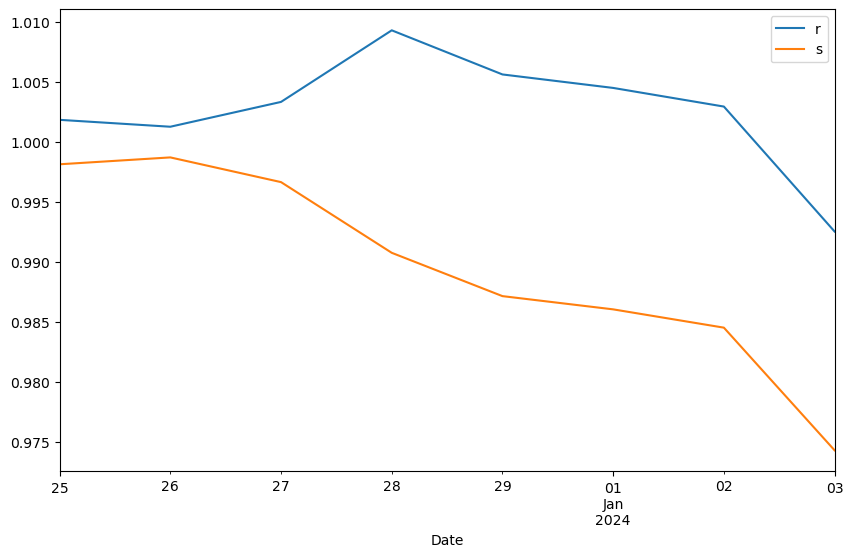

In [198]:
data[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [199]:
sum(data['p'].diff() != 0) + 2 

4

In [200]:
pc = 0.005 

In [201]:
data['s_'] = np.where(data['p'].diff() != 0, data['s'] - pc, data['s']) 

In [202]:
data['s_'].iloc[0] -= pc

C:\Users\akram\AppData\Local\Temp\ipykernel_38168\1780373582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['s_'].iloc[0] -= pc


In [203]:
data['s_'].iloc[-1] -= pc 

C:\Users\akram\AppData\Local\Temp\ipykernel_38168\3518440044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['s_'].iloc[-1] -= pc


In [204]:
data[['r', 's', 's_']][data['p'].diff() != 0]

,r,s,s_
Date,,,
2023-12-25,0.001851,-0.001851,-0.011851
2023-12-29,-0.003648,-0.003648,-0.008648


In [205]:
data[['r', 's', 's_']].sum().apply(np.exp)


r     0.992550
s     0.974325
s_    0.955032
dtype: float64

In [206]:
data[['r', 's', 's_']].sum().apply(np.exp) - 1


r    -0.007450
s    -0.025675
s_   -0.044968
dtype: float64

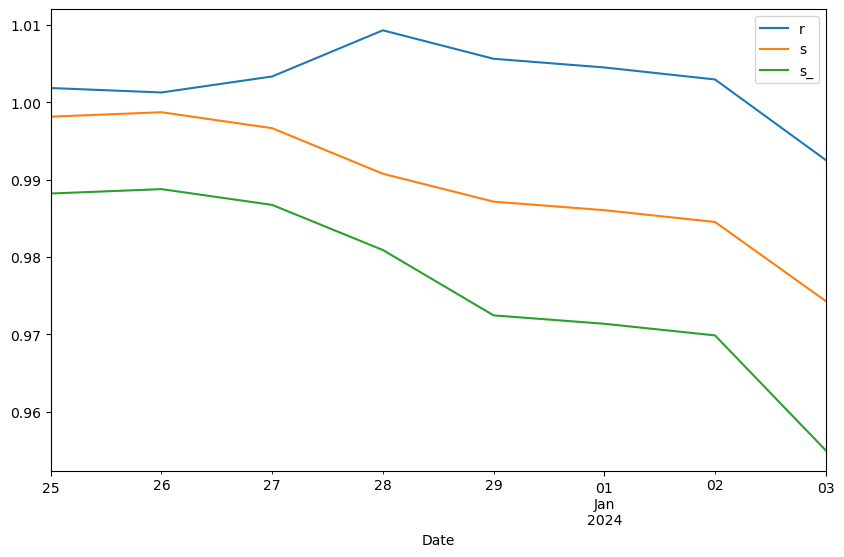

In [207]:
data[['r', 's', 's_']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [208]:
data

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252,p,r,s,s_
Date,,,,,,,,,,,,,
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,1.08,1.08,0.00,-1.0,0.001851,-0.001851,-0.011851
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,1.08,1.08,0.00,-1.0,-0.000573,0.000573,0.000573
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,1.08,1.08,0.00,-1.0,0.002063,-0.002063,-0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,1.09,1.08,0.01,-1.0,0.005926,-0.005926,-0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,1.09,1.08,0.01,1.0,-0.003648,-0.003648,-0.008648
2024-01-01,1.105583,1.105339,1.103997,1.105583,1.105583,0,1.09,1.08,0.01,1.0,-0.001117,-0.001117,-0.001117
2024-01-02,1.103875,1.104606,1.094200,1.103875,1.103875,0,1.09,1.08,0.01,1.0,-0.001547,-0.001547,-0.001547
2024-01-03,1.094691,1.096732,1.089800,1.092419,1.092419,0,1.09,1.08,0.01,1.0,-0.010432,-0.010432,-0.015432


In [209]:
data[['r', 's', 's_']].std()

r     0.004809
s     0.003471
s_    0.005758
dtype: float64

In [210]:
data[['r', 's', 's_']].std() * math.sqrt(252)

r     0.076347
s     0.055101
s_    0.091409
dtype: float64